## Selection and training of the model using the encoded data.
### The first model will be a linear regression model.

In [29]:
# importing the cleaned data 
import pandas as pd

data = pd.read_csv('../encoded data/enc3.csv')
data

,Unnamed: 0,Age,Income (USD),Income Stability,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,5,60,1234.92,0,15,0,34434.72,181.48,0,0,2.0,684.12,1,1,0,1.0,43146.82,22382.57
1,8,38,1296.07,0,2,0,35141.99,155.95,0,1,3.0,705.29,1,0,0,1.0,54903.44,22842.29
2,10,18,2416.86,0,3,1,25765.72,140.02,0,1,1.0,652.41,0,0,0,1.0,32423.71,16747.72
3,14,61,1664.52,0,3,1,72448.95,398.88,0,1,2.0,781.51,0,0,2,1.0,113464.01,54336.71
4,15,54,3716.54,0,4,0,116487.58,521.23,1,1,4.0,749.33,1,0,2,1.0,194442.39,75716.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9617,29985,18,3593.59,0,4,1,37012.73,206.90,0,1,2.0,714.09,0,1,0,1.0,44312.35,24058.27
9618,29986,32,8308.27,0,10,2,75696.52,418.60,1,1,3.0,784.91,0,1,1,1.0,106908.58,52987.56
9619,29995,38,4969.41,0,10,2,76657.90,722.34,1,1,2.0,869.61,0,2,2,1.0,111096.56,68992.11
9620,29996,20,1606.88,0,8,1,66595.14,253.04,0,0,3.0,729.41,0,1,2,1.0,73453.94,46616.60


In [30]:
# importing and creating the object of the regression model
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()

In [31]:
X = data.drop(['Loan Sanction Amount (USD)', 'Unnamed: 0'], axis=1)
X

,Age,Income (USD),Income Stability,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price
0,60,1234.92,0,15,0,34434.72,181.48,0,0,2.0,684.12,1,1,0,1.0,43146.82
1,38,1296.07,0,2,0,35141.99,155.95,0,1,3.0,705.29,1,0,0,1.0,54903.44
2,18,2416.86,0,3,1,25765.72,140.02,0,1,1.0,652.41,0,0,0,1.0,32423.71
3,61,1664.52,0,3,1,72448.95,398.88,0,1,2.0,781.51,0,0,2,1.0,113464.01
4,54,3716.54,0,4,0,116487.58,521.23,1,1,4.0,749.33,1,0,2,1.0,194442.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9617,18,3593.59,0,4,1,37012.73,206.90,0,1,2.0,714.09,0,1,0,1.0,44312.35
9618,32,8308.27,0,10,2,75696.52,418.60,1,1,3.0,784.91,0,1,1,1.0,106908.58
9619,38,4969.41,0,10,2,76657.90,722.34,1,1,2.0,869.61,0,2,2,1.0,111096.56
9620,20,1606.88,0,8,1,66595.14,253.04,0,0,3.0,729.41,0,1,2,1.0,73453.94


In [32]:
Y = data['Loan Sanction Amount (USD)']
Y

0       22382.57
1       22842.29
2       16747.72
3       54336.71
4       75716.93
          ...   
9617    24058.27
9618    52987.56
9619    68992.11
9620    46616.60
9621    99766.87
Name: Loan Sanction Amount (USD), Length: 9622, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [34]:
X_train

,Age,Income (USD),Income Stability,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price
6539,60,2020.35,0,1,0,71906.69,316.88,0,1,3.0,652.64,0,0,2,1.0,105510.00
2815,48,2218.93,0,9,0,32130.63,263.61,0,1,3.0,759.27,1,2,1,1.0,37271.55
8955,54,2201.38,0,2,0,123354.48,557.48,0,1,2.0,750.35,0,0,1,1.0,160350.80
197,31,1373.48,0,0,0,175830.59,520.43,0,1,2.0,855.00,0,2,1,1.0,250309.28
6909,20,4834.57,0,16,1,240529.68,703.30,1,1,1.0,737.79,0,2,1,1.0,403084.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,18,1930.86,0,14,0,68134.68,472.57,0,0,1.0,698.57,1,1,1,1.0,117648.76
7291,34,2551.17,0,8,1,105743.25,530.51,0,0,1.0,722.94,0,1,2,1.0,200153.95
1344,48,3128.34,0,8,1,158303.16,768.12,1,1,2.0,651.41,0,0,1,1.0,181810.73
7293,63,5025.58,0,5,1,115998.65,532.31,1,1,3.0,793.23,0,0,0,1.0,187481.41


In [35]:
Y_train.le(0).sum()

0

In [36]:
# training the model
model.fit(X_train, Y_train)

BayesianRidge()

In [37]:
# testing the model
predictions = model.predict(X_test)

In [38]:
Y_test[Y_test.le(0)]

Series([], Name: Loan Sanction Amount (USD), dtype: float64)

In [39]:
score = model.score(X_test, Y_test)

from sklearn.metrics import r2_score
r2_score(Y_test, predictions)

0.9874254672934014

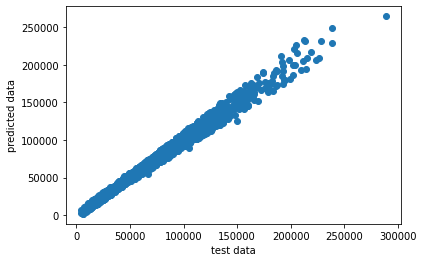

In [40]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, predictions)
plt.xlabel('test data')
plt.ylabel('predicted data')

plt.show()

## The score of this Linear regression model is 0.6384150927269052 i.e it is not an accurate model. We can also observe the extreme variances in the scatterplot above. So we need to clean our data even more and/or choose another regression model.